In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns

# Question

##### Is 'emlak' search term related to 
##        1) House Sales Statistics
##        2) Tendency to buy Surveys
##        3) Bank Interests

### from 01-01-2013 to 01-01-2022

In [2]:
trend_data = pd.read_csv("multiTimeline.csv", header=1)
trend_data["Month"] = trend_data["Month"].astype("datetime64")
trend_data = trend_data.set_index("Month")

trend_data.columns = ["search_count"]

In [3]:
def time_series_formatter(fig, ax):
    x_format = mdates.DateFormatter('%B %Y')
    ax.xaxis.set_major_formatter(x_format)

    half_year_locator = mdates.MonthLocator(interval=4)
    ax.xaxis.set_major_locator(half_year_locator)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


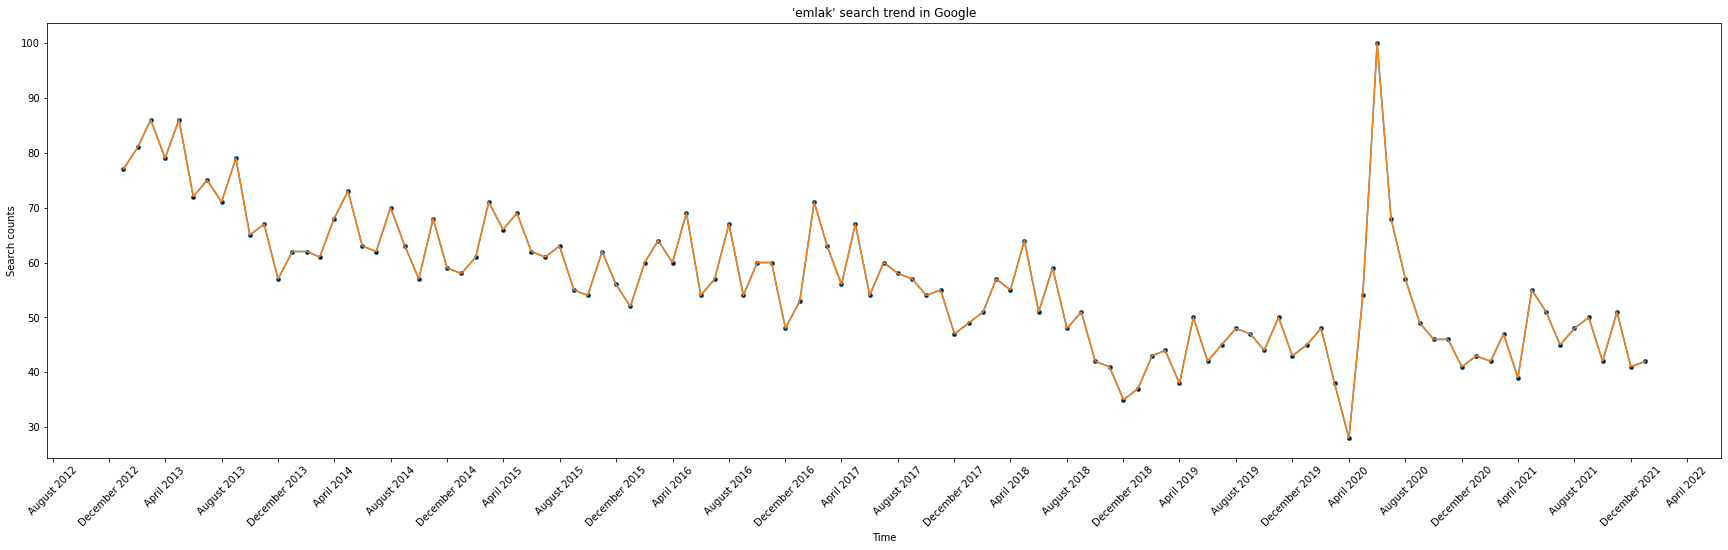

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

ax.plot(trend_data, marker=".", markersize=8, markerfacecolor="black")
time_series_formatter(fig, ax)

ax.set_title("'emlak' search trend in Google")
ax.set_xlabel("Time")
ax.set_ylabel("Search counts")
plt.style.use('ggplot')

plt.plot(trend_data)
plt.show()
plt.clf()

In [5]:
evds = pd.read_excel("EVDS.xlsx")

In [6]:
evds = evds.rename(columns = {evds.columns[0] : "Date", evds.columns[1]: "House Sales", evds.columns[2] : "Average Interest Rates for Housing Loans",
                              evds.columns[3]: "The Probability of Buying or Building a Home"})
evds = evds.dropna()
evds.Date = evds.Date.astype("datetime64")
evds = evds.set_index("Date")

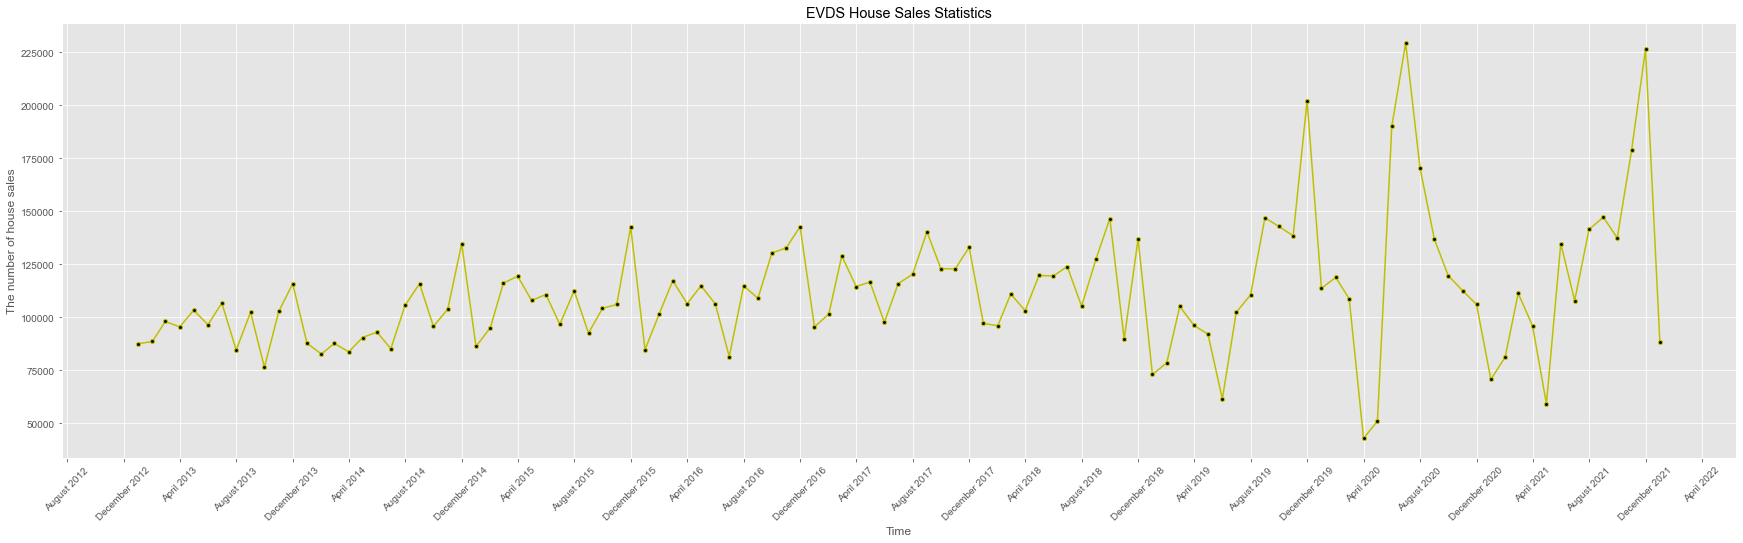

<Figure size 576x396 with 0 Axes>

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
ax.plot(evds[['House Sales']], marker=".", markersize=8, markerfacecolor="black", color = 'y')

time_series_formatter(fig, ax)

ax.set_title('EVDS House Sales Statistics')
ax.set_xlabel("Time")
ax.set_ylabel("The number of house sales")
plt.style.use('seaborn')
plt.show()
plt.clf()

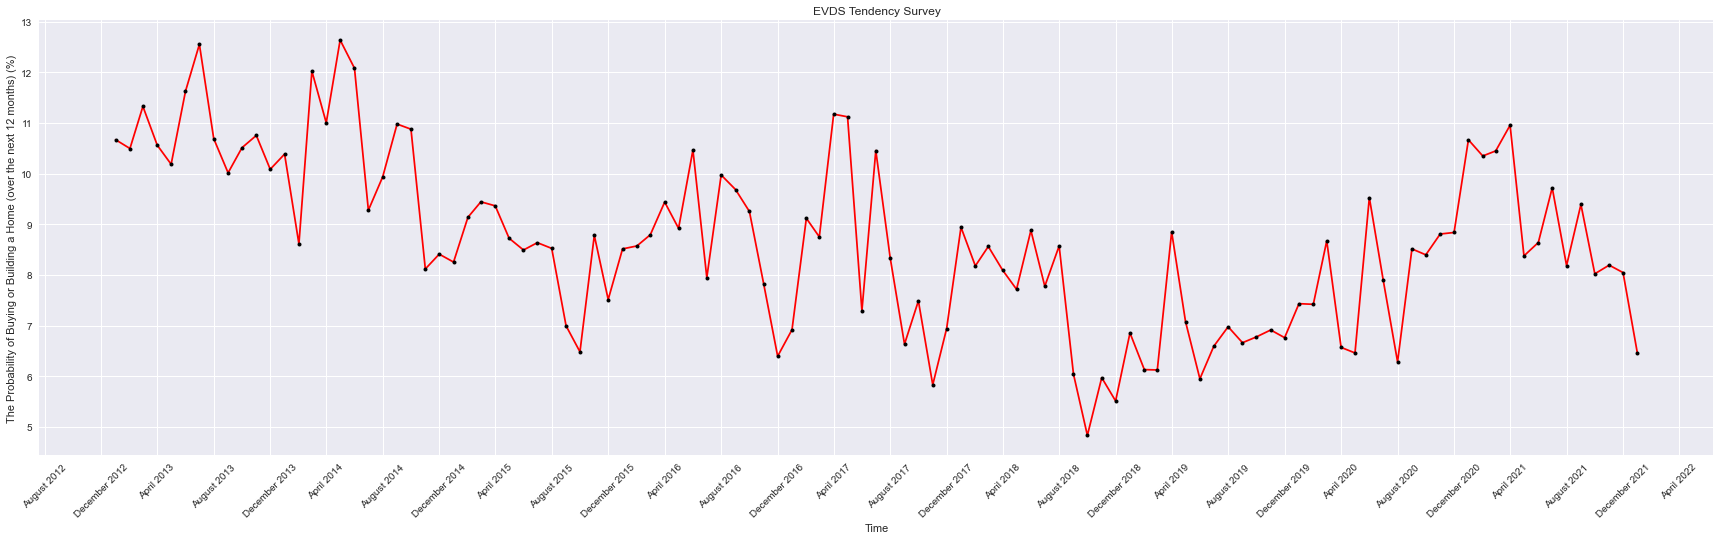

<Figure size 576x396 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
ax.plot(evds[['The Probability of Buying or Building a Home']], color = 'r',marker=".", markersize=8, markerfacecolor="black")

time_series_formatter(fig, ax)

ax.set_title('EVDS Tendency Survey')
ax.set_xlabel("Time")
ax.set_ylabel("The Probability of Buying or Building a Home (over the next 12 months) (%)")
plt.style.use('ggplot')
plt.show()
plt.clf()

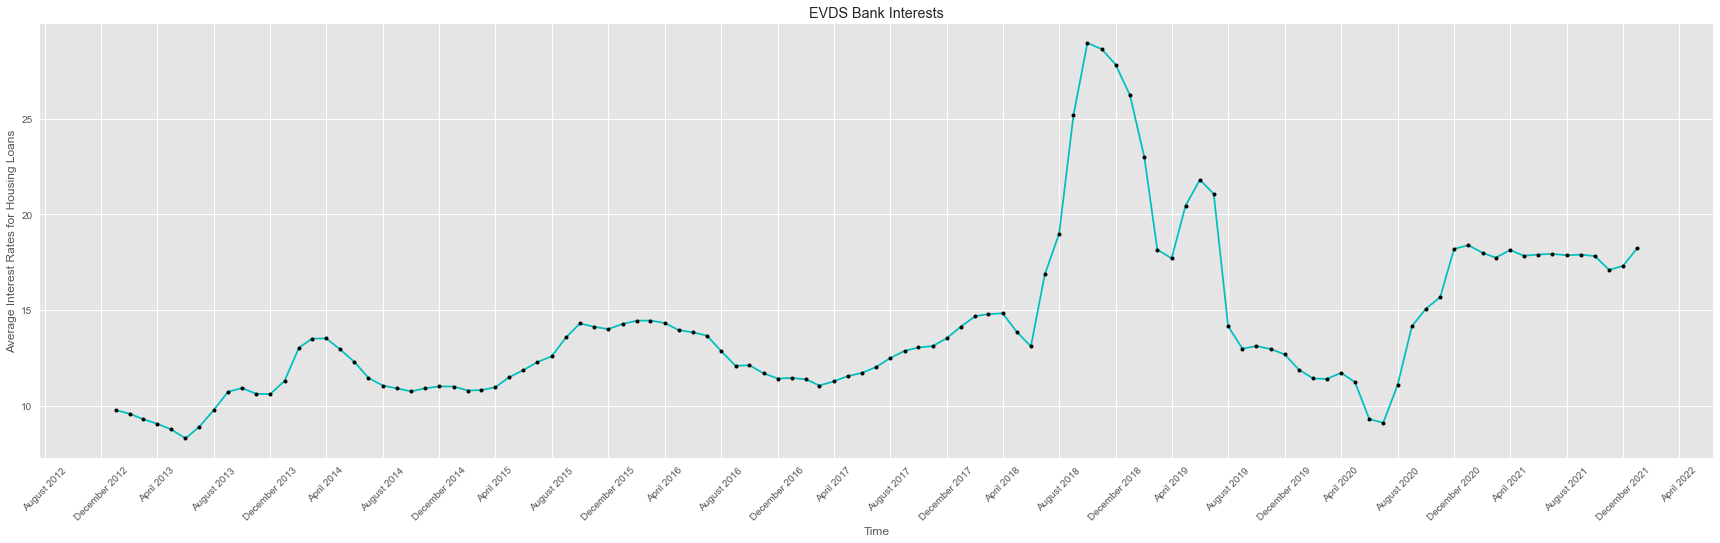

<Figure size 576x396 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
ax.plot(evds[['Average Interest Rates for Housing Loans']], color = 'c', marker=".", markersize=8, markerfacecolor="black")

time_series_formatter(fig, ax)

ax.set_title('EVDS Bank Interests')
ax.set_xlabel("Time")
ax.set_ylabel("Average Interest Rates for Housing Loans")
plt.show()
plt.clf()

## Question I) Do google trends show house sales? Can we make such assumption?

#### Two time series in a plot

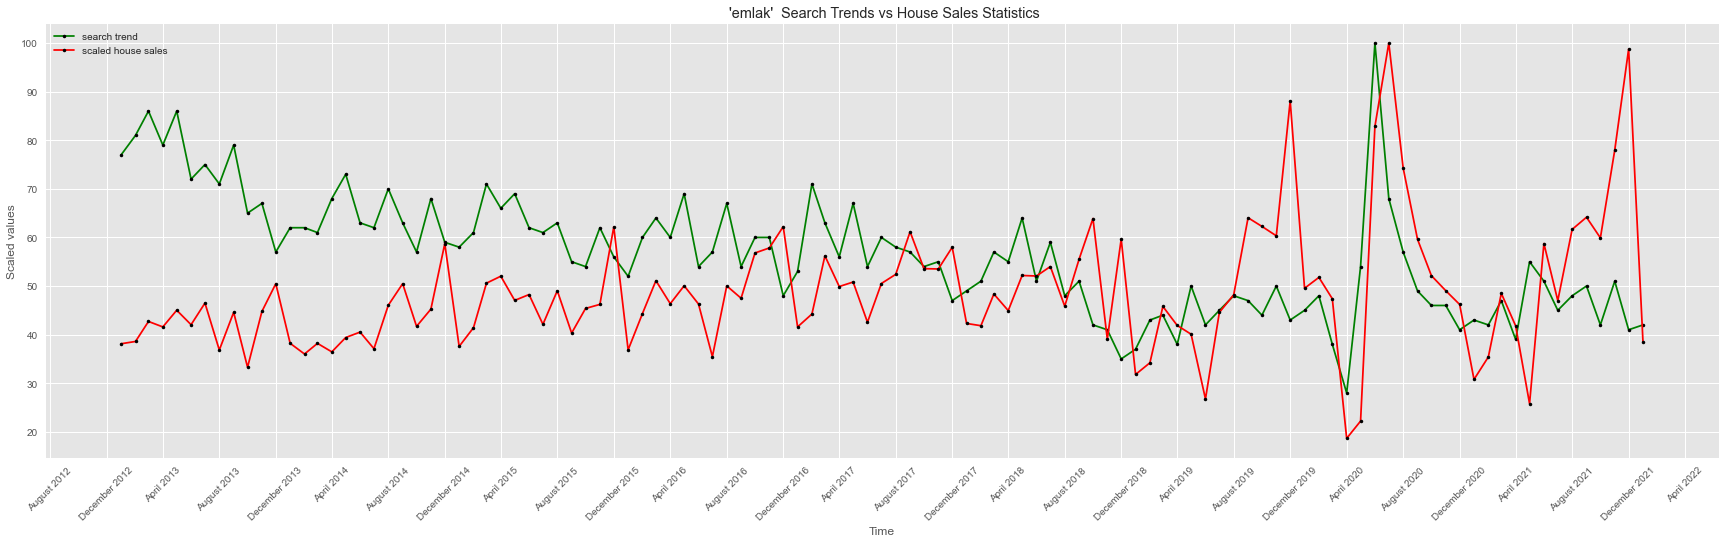

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

scaled_house_sales = pd.DataFrame(100*np.array(evds['House Sales'])/np.array(max(evds['House Sales'])), index = evds.index)
ax.plot(trend_data, color = 'g', label = 'search trend', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.plot(scaled_house_sales, color = 'r', label = 'scaled house sales', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.set_ylabel('Scaled values')
ax.set_xlabel('Time')
ax.set_title(' \'emlak\'  Search Trends vs House Sales Statistics')
plt.legend()

time_series_formatter(fig, ax)

#### Fluctuations

In [11]:
diff_scaled_house_sales = scaled_house_sales.diff()
diff_trend_data = trend_data.diff()

diff_scaled_house_sales.columns = ['sales_diff']

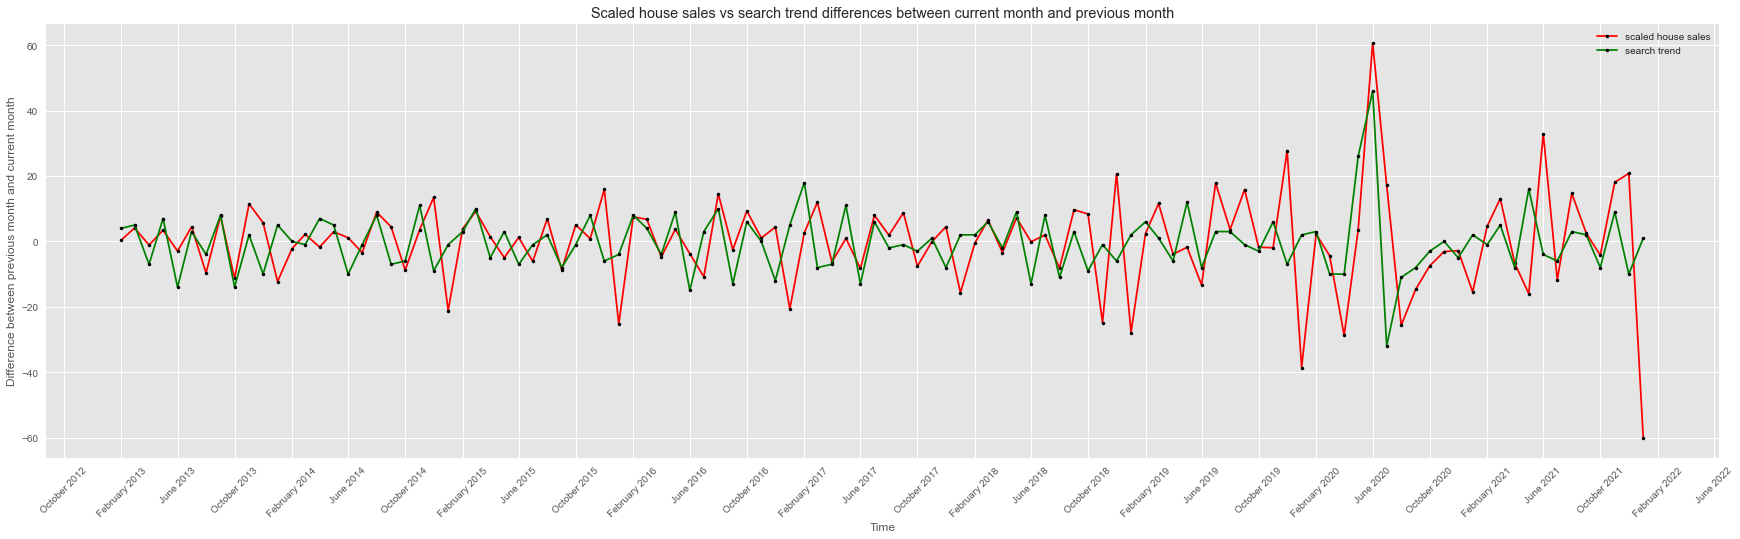

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
time_series_formatter(fig, ax)

ax.plot(diff_scaled_house_sales, color ='r', label = 'scaled house sales', marker = '.', markerfacecolor = 'black')
ax.plot(diff_trend_data , color ='g', label = 'search trend', marker = '.', markerfacecolor = 'black')

ax.set_ylabel('Difference between previous month and current month')
ax.set_xlabel('Time')
ax.set_title('Scaled house sales vs search trend differences between current month and previous month')
plt.legend()

In [13]:
diff_scaled_house_sales.index = diff_scaled_house_sales.index.year
diff_trend_data.index = diff_trend_data.index.year

diff_scaled_house_sales_years = pd.concat([diff_scaled_house_sales.loc['2013','sales_diff'].reset_index(), diff_scaled_house_sales.loc['2014','sales_diff'].reset_index(), diff_scaled_house_sales.loc['2015','sales_diff'].reset_index(),
           diff_scaled_house_sales.loc['2016','sales_diff'].reset_index(),diff_scaled_house_sales.loc['2017','sales_diff'].reset_index(),diff_scaled_house_sales.loc['2018','sales_diff'].reset_index(),
           diff_scaled_house_sales.loc['2019','sales_diff'].reset_index(), diff_scaled_house_sales.loc['2020','sales_diff'].reset_index(), diff_scaled_house_sales.loc['2021','sales_diff'].reset_index(),], axis=1).drop(['Date'],axis = 1)

diff_trend_data_years = pd.concat([diff_trend_data.loc['2013','search_count'].reset_index(), diff_trend_data.loc['2014','search_count'].reset_index(), diff_trend_data.loc['2015','search_count'].reset_index(),
           diff_trend_data.loc['2016','search_count'].reset_index(), diff_trend_data.loc['2017','search_count'].reset_index(), diff_trend_data.loc['2018','search_count'].reset_index(),
           diff_trend_data.loc['2019','search_count'].reset_index(), diff_trend_data.loc['2020','search_count'].reset_index(), diff_trend_data.loc['2021','search_count'].reset_index(),], axis=1).drop(['Month'], axis = 1)

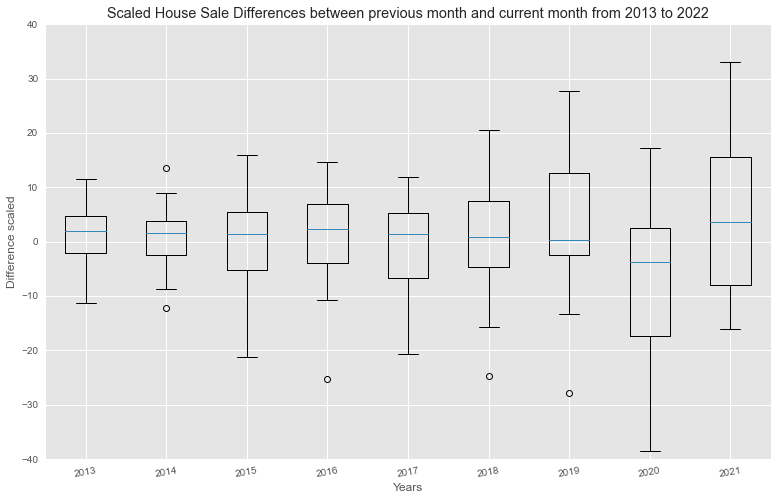

<Figure size 576x396 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(13,8)

ax.boxplot(diff_scaled_house_sales_years.fillna(diff_trend_data_years.iloc[:,0].mean()))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["2013", "2014", "2015", "2016", '2017', '2018', '2019', '2020', '2021'], rotation=10)
ax.set_title('Scaled House Sale Differences between previous month and current month from 2013 to 2022')
ax.set_xlabel('Years')
ax.set_ylabel('Difference scaled')

plt.ylim(-40, 40)

plt.show()
plt.clf()

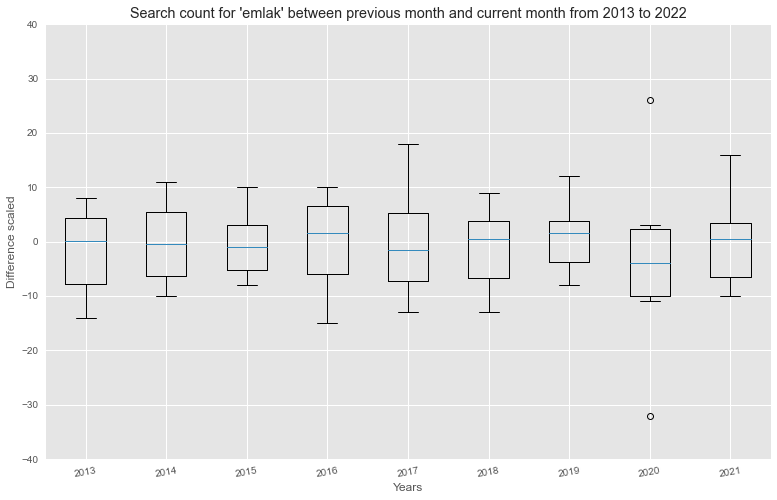

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(13,8)

ax.boxplot(diff_trend_data_years.fillna(diff_trend_data_years.iloc[:,0].mean()))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["2013", "2014", "2015", "2016", '2017', '2018', '2019', '2020', '2021'], rotation=10)
ax.set_title('Search count for \'emlak\' between previous month and current month from 2013 to 2022')
ax.set_xlabel('Years')
ax.set_ylabel('Difference scaled')

plt.ylim(-40, 40)

plt.show()

## Question II) Do google trends correlate with surveys conducted about the tendency to buy or build house?

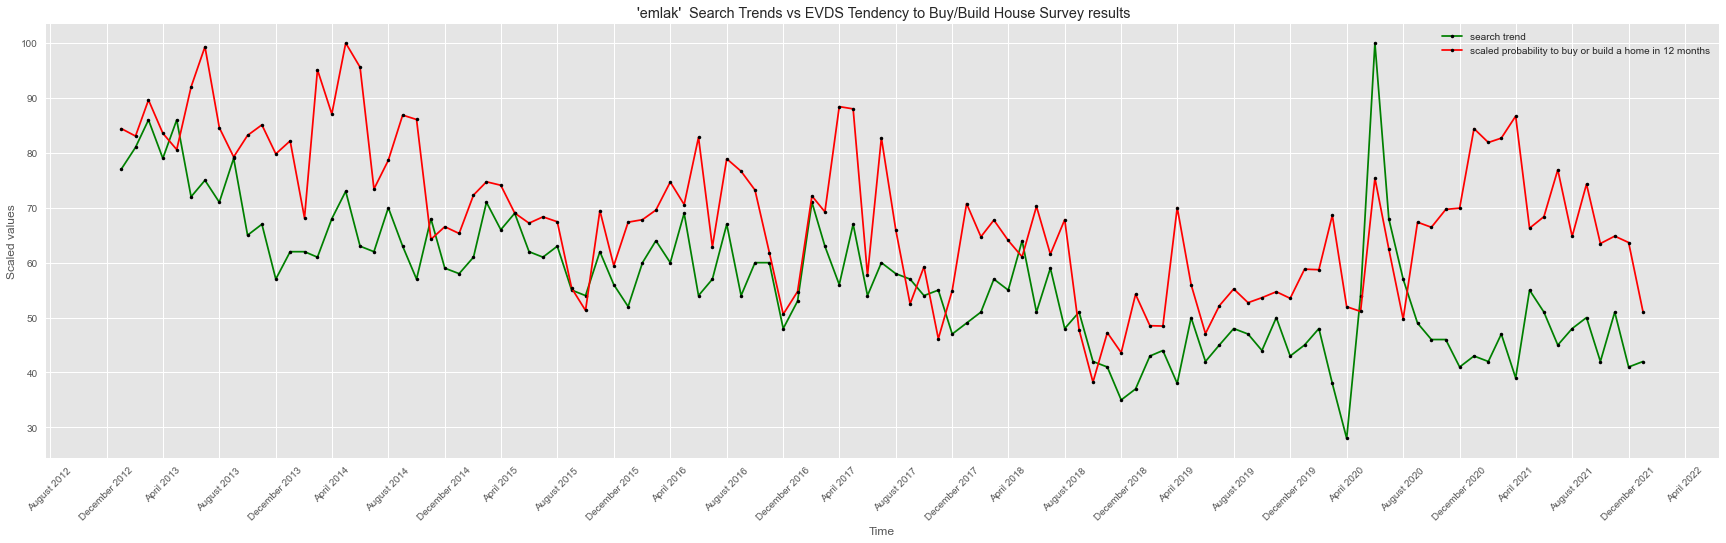

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

scaled_prob = pd.DataFrame(100*np.array(evds['The Probability of Buying or Building a Home'])/np.array(max(evds['The Probability of Buying or Building a Home'],)), index = evds.index)

ax.plot(trend_data, color = 'g', label = 'search trend', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.plot(scaled_prob, color = 'r', label = 'scaled probability to buy or build a home in 12 months', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.set_ylabel('Scaled values')
ax.set_xlabel('Time')
ax.set_title(' \'emlak\'  Search Trends vs EVDS Tendency to Buy/Build House Survey results')
plt.legend()

time_series_formatter(fig, ax)

In [17]:
scaled_prob.columns = ['prob']

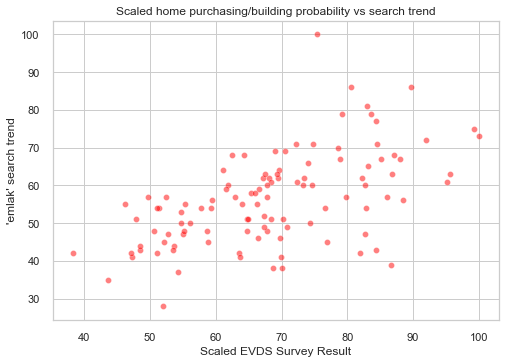

<Figure size 576x396 with 0 Axes>

In [18]:
sns.set(style='whitegrid')
sns.scatterplot(x = np.array(scaled_prob.prob), y = np.array(trend_data.search_count), color='red', alpha=0.5)

plt.title('Scaled home purchasing/building probability vs search trend')
plt.xlabel('Scaled EVDS Survey Result')
plt.ylabel('\'emlak\' search trend')

plt.show()
plt.clf()

## Question III) Do google trends negatively correlate with interest rates on the house loans?

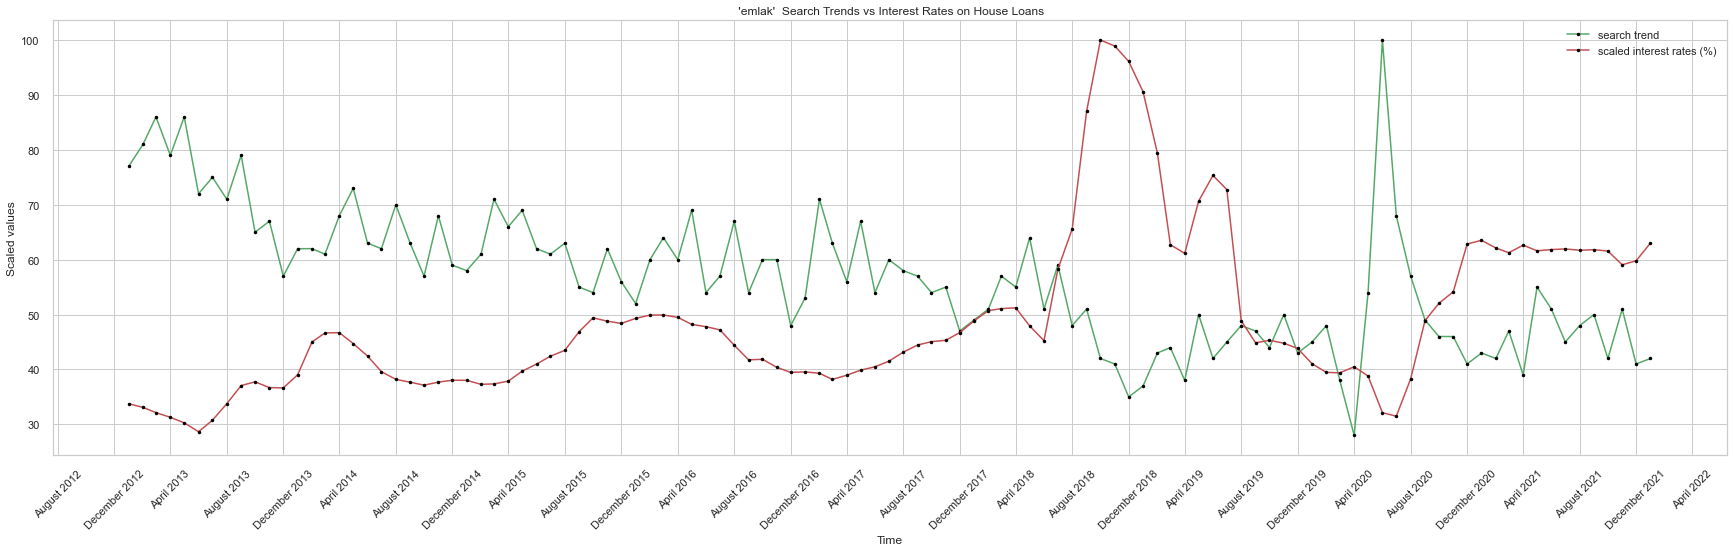

<Figure size 576x396 with 0 Axes>

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)

scaled_interests = pd.DataFrame(100*np.array(evds['Average Interest Rates for Housing Loans'])/np.array(max(evds['Average Interest Rates for Housing Loans'])), index = evds.index)
ax.plot(trend_data, color = 'g', label = 'search trend', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.plot(scaled_interests, color = 'r', label = 'scaled interest rates (%)', marker = '.', markersize = 7, markerfacecolor = 'black')
ax.set_ylabel('Scaled values')
ax.set_xlabel('Time')
ax.set_title(' \'emlak\'  Search Trends vs Interest Rates on House Loans')
plt.legend()

time_series_formatter(fig, ax)
plt.show()
plt.clf()

In [20]:
scaled_interests = scaled_interests.rolling(6).mean() 
scaled_interests_rolled  = scaled_interests.iloc[::6, :]
scaled_interests_rolled .columns = ['interest']

trend_data = trend_data.rolling(6).mean() 
trend_data_rolled  = trend_data.iloc[::6, :]

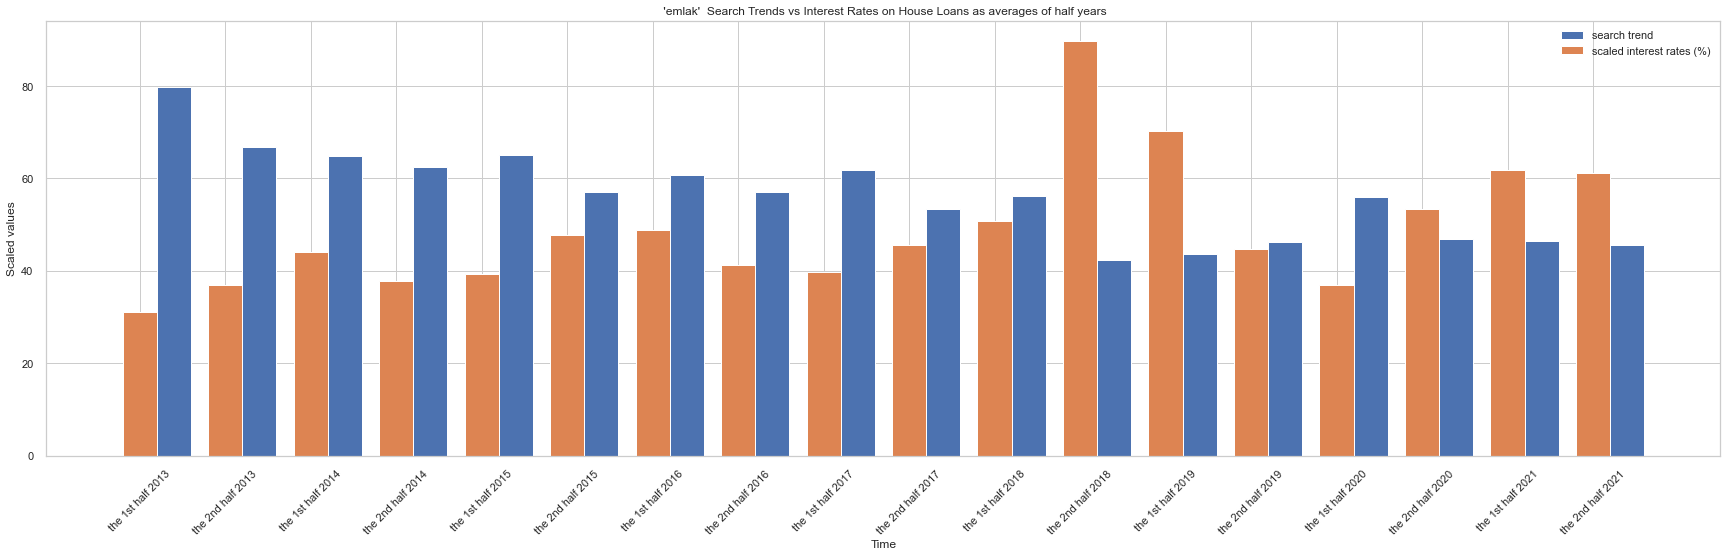

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(30,8)
X =  range(len(trend_data_rolled.dropna()))
X_axis = np.arange(len(X))

ax.bar(X_axis + 0.2, trend_data_rolled.search_count.dropna(), 0.4, label = 'search trend')
ax.bar(X_axis - 0.2, scaled_interests_rolled.interest.dropna(),  0.4,  label = 'scaled interest rates (%)',tick_label = ['the 1st half 2013','the 2nd half 2013','the 1st half 2014','the 2nd half 2014','the 1st half 2015','the 2nd half 2015','the 1st half 2016','the 2nd half 2016','the 1st half 2017','the 2nd half 2017',
               'the 1st half 2018','the 2nd half 2018','the 1st half 2019','the 2nd half 2019','the 1st half 2020','the 2nd half 2020','the 1st half 2021','the 2nd half 2021'])
ax.set_ylabel('Scaled values')
ax.set_xlabel('Time')
ax.set_title(' \'emlak\'  Search Trends vs Interest Rates on House Loans as averages of half years')

for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.legend()
plt.show()